In [15]:
import numpy as np
import matplotlib.pyplot as plt 

# FMD 1

In [41]:
def analytical(t):
    return (2.5*np.exp(-2*t) - (3/2))

def EX(y_n, t):
    A, Ob = [], []
    time = np.arange(0.0, 50, t)
    for i in time:
        y_n2 = -(2*y_n + 3)*t + y_n
        Ob.append(y_n)
        y_n = y_n2
        a = analytical(i)
        A.append(a)
    return A, Ob, time

def IM(y_n, t):
    A, ob = [], []
    time = np.arange(0.0, 50, t)
    for i in time:
        y_n2 = (-3*t + y_n)/(1+2*t)
        ob.append(y_n)
        y_n = y_n2
        a = analytical(i)
        A.append(a)
    return A, ob, time

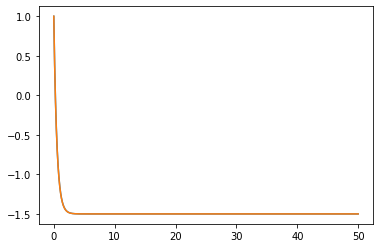

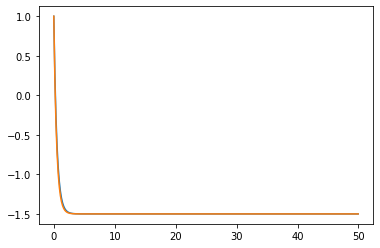

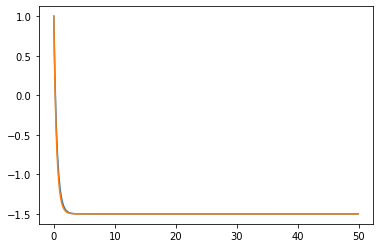

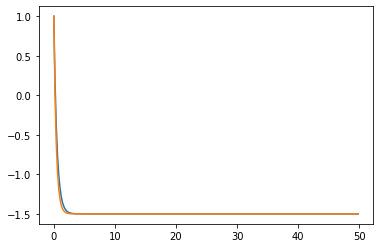

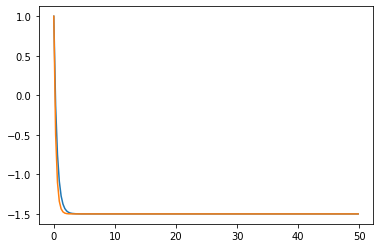

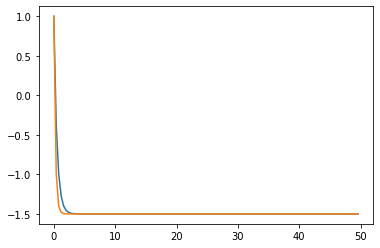

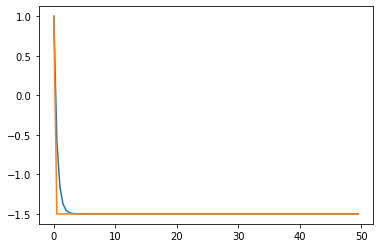

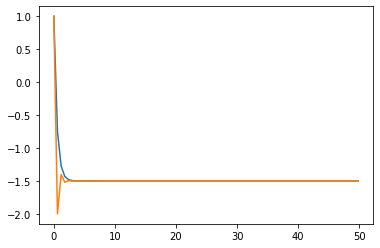

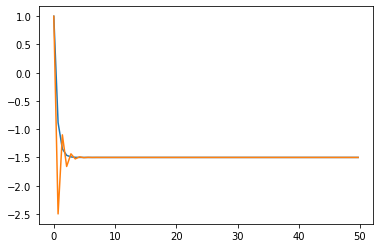

<Figure size 432x288 with 0 Axes>

In [42]:
for i in [0.01, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]:
    A, Ob, time = EX(1, i) 
    plt.plot(time, A)
    plt.plot(time, Ob)
    plt.figure()

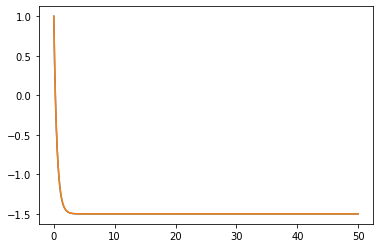

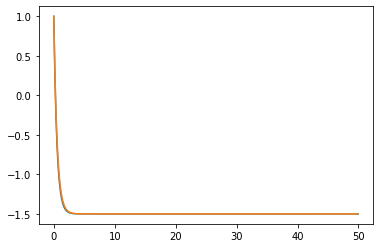

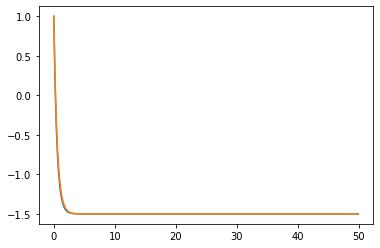

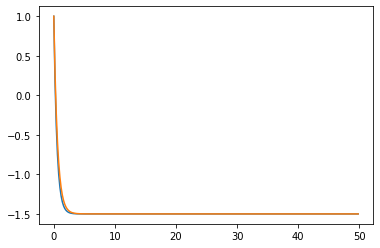

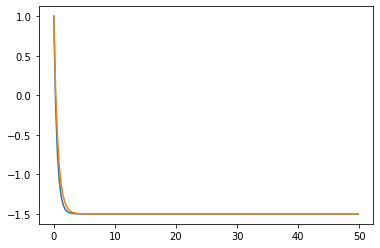

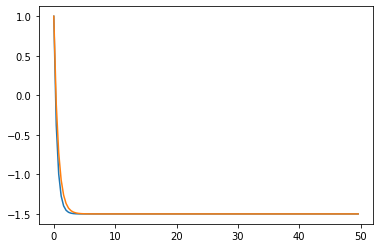

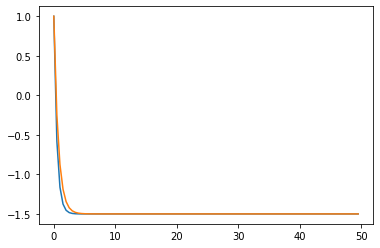

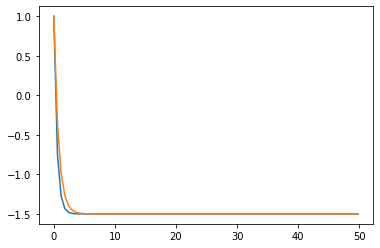

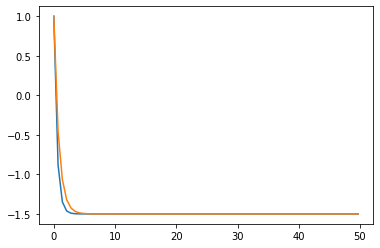

<Figure size 432x288 with 0 Axes>

In [44]:
for i in [0.01, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]:
    A1, Ob1, t1 = IM(1, i) 
    plt.plot(t1, A1)
    plt.plot(t1, Ob1)
    plt.figure()

# Heat Equation-1

In [90]:
def mult(A, n):
    A1 = A
    for i in range(1, n):
        A1 = np.matmul(A, A1)
    return A1
        

def HE1(dt, dx,  sig):
    t = np.linspace(0, dt, 50)
    x = np.linspace(0, dx, 50)
    A = np.zeros(shape = (len(x), len(x)))
    for i in range(len(x)):
        for j in range(len(t)):
            if (i == 0 and j == 0) or (i == len(x)-1 and j == len(t)-1):
                A[i][j]= 1
            elif i == j:
                A[i][j] = (1-2*sig)
                A[i][j-1] = sig
                A[i][j+1] = sig
    u = np.zeros(shape=(len(x), 1))
    u[0] = 100
    u[len(x)-1] = 50
    u1 = u
    for i in range(len(t)):
        u1 = np.matmul(mult(A, i), u)
        plt.plot(x,u1)
    plt.show()

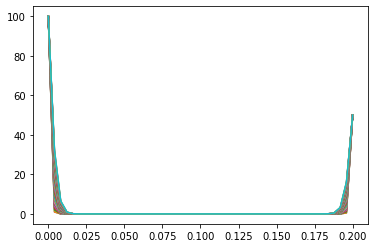

In [91]:
HE1(0.1, 0.2, 0.01)

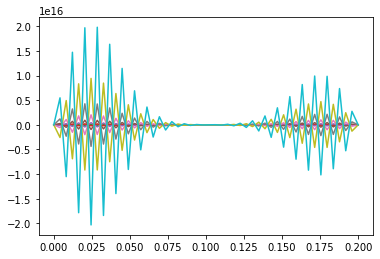

In [92]:
HE1(0.1, 0.2, 0.8)

# Heat Equation - 2

In [93]:
def mult(A, n):
    A1 = A
    for i in range(1, n):
        A1 = np.matmul(A, A1)
    return A1
        

def HE2(dt, dx,  sig):
    t = np.linspace(0, dt, 50)
    x = np.linspace(0, dx, 50)
    A = np.zeros(shape = (len(x), len(x)))
    for i in range(len(x)):
        for j in range(len(t)):
            if (i == 0 and j == 0) or (i == len(x)-1 and j == len(t)-1):
                A[i][j]= 1
            elif i == j:
                A[i][j] = (2*sig -1)
                A[i][j-1] = -sig
                A[i][j+1] = -sig
    u = np.zeros(shape=(len(x), 1))
    u[0] = 100
    u[len(x)-1] = 50
    u1 = u
    for i in range(len(t)):
        u1 = np.matmul(mult(A, i), u)
        plt.plot(x,u1)
    plt.show()

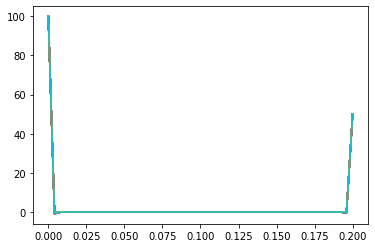

In [94]:
HE2(0.1, 0.2, 0.01)

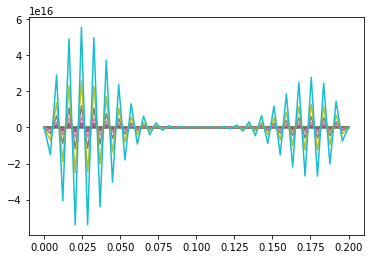

In [95]:
HE2(0.1, 0.2, 0.8)

# Laplace Equation

In [192]:
def LE(n):
    e = 0.1
    A = np.zeros(shape = (n, n))
    conv = 0
    D = np.zeros(A.shape)
    for i in range(n):
        for j in range(n):
            if i == 0 and j!=i:
                A[i][j] = 100
            elif i == n-1 and j!=i:
                A[i][j] = -100
            elif (i == 0 and j == 0):
                A[i][j]= 50
            elif (i == n-1 and j == n-1):
                A[i][j] = -50
    B = np.copy(A)
    for k in range(1000):
#         print(k)
        for i in range(1, n-1):
            for j in range(1, n-1):
                A[i][j] = 0.25*(B[i+1][j]+B[i-1][j]+B[i][j-1]+B[i][j+1])
                D[i][j] = abs(A[i][j] - B[i][j])
        if np.max(D)<e:
            conv = k
            break
        B = np.copy(A)
    return A, conv
# LE(30)

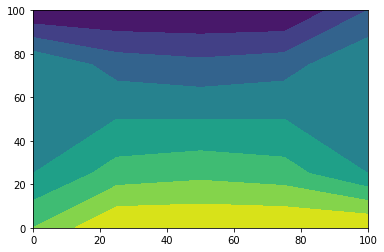

In [193]:
K = LE(5)
x = np.linspace(0, 100, 5)
y = np.linspace(0, 100, 5)

X, Y = np.meshgrid(x, y)

#plt.contour(X, Y, K[0], colors='black');
plt.contourf(X,Y,K[0])

In [194]:
X, Y = [], []
for s in [20, 30, 40, 50, 60]:
    h = LE(s)
    X.append(h[1])
    Y.append(h[1]*((s-1)**2))
print(X, Y)

[89, 152, 201, 228, 238] [32129, 127832, 305721, 547428, 828478]
